# seaborn学习笔记-类别数据可视化之catplot

```
seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
```

catplot与relplot函数相似，也是在FaceGrid绘图的figure-level函数，大部分参数与relplot相同，此处不再一一介绍。
catplot也是通过kind参数来调用不同的底层axes-level函数。这些底层函数可以分为三类：
1. 类别散点图
    - stripplot() (kind="strip"; 默认)
    - swarmplot() (with kind="swarm")
2. 类别分布图
    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")
3. 类别估计图
    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")


In [1]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## 类别散点图

catplot的默认行为是绘制散点图。在seaborn中有两种不同的类别散点图函数。主要区别在于沿着分类变量对应的轴线属于一个类别的点落在同一位置上时如何处理。
catplot的参数kind默认值使用stripplot()函数绘图，该函数采用少量的随机“抖动”来调整分类轴上的点的位置。

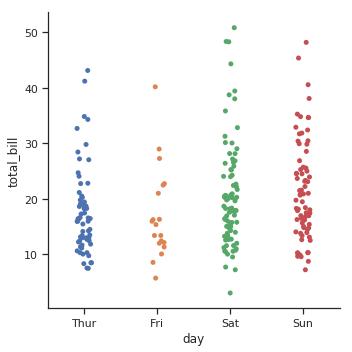

In [2]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

参数jitter用于控制抖动的大小，False禁用抖动，True使用默认的抖动大小，或者用一个float数值表示抖动大小，通常[0-0.5]

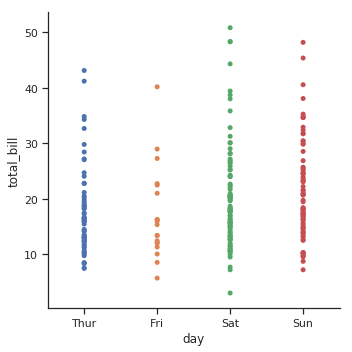

In [3]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

另一种方法时使用某种防重合的算法来调整点的位置，对于较小的数据集，这种方法可以更好的展示观测值的分布。可以设置kind参数值为swarm来调用swarmplot()绘制散点图。

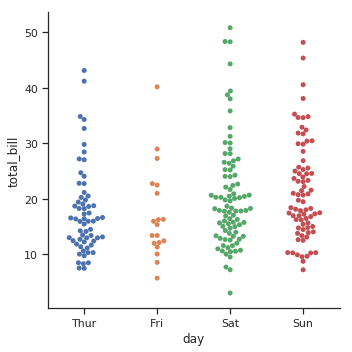

In [4]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

与关系图的绘制类似，通过设置颜色（hue）、样式（style）以及大小（size）来增加不同的维度

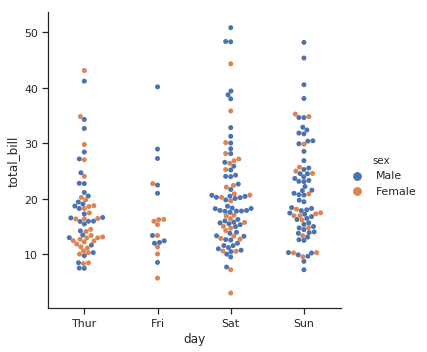

In [5]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

如果赋值给类别轴变量的类型为数值型类型，seaborn会对其进行排序，然后将其视作分类数据来绘图

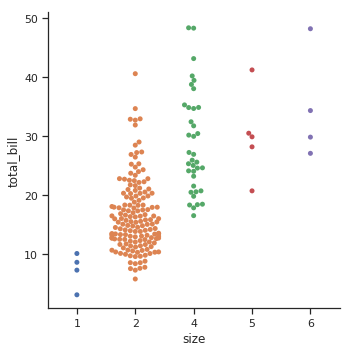

In [6]:
sns.catplot(x="size", y="total_bill", kind="swarm",data=tips.query("size != 3"))

当然也可以通过order参数自定义类别轴上的顺序。如果需要在同一个图上绘制多个类别图，这个参数十分重要

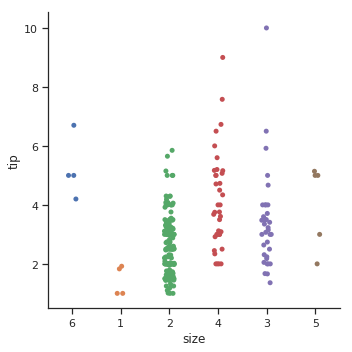

In [7]:
sns.catplot(x="size", y="tip", order=[6,1,2,4,3,5], data=tips)

以上示例中都是用横轴代表类别变量，当然也可以用纵轴代表类别变量。

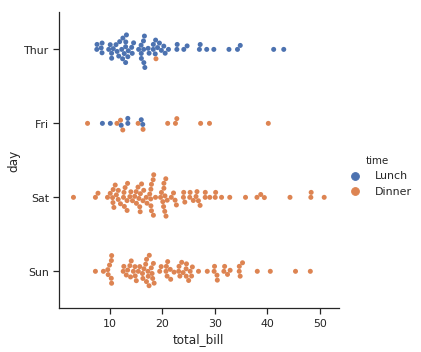

In [8]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

## 类别分布图

随着数据集的大小的增长，分类散点图并不能很好地描述每个类别的值分布。此时可以选用箱形图、小提琴图等来描述分布信息，同时比较不同类别的值分布

### 箱形图

箱形图是一种用作显示一组数据分散情况统计图。它能显示出一组数据的最大值、最小值、中位数、及上下四分位数。

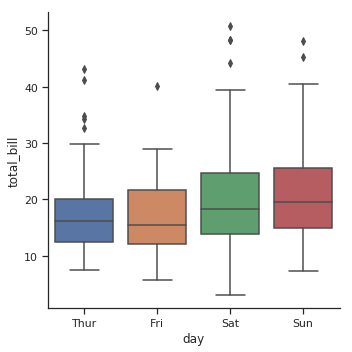

In [9]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

当添加色调语义时，语义变量的每个级别的框沿分类轴移动并且不重叠

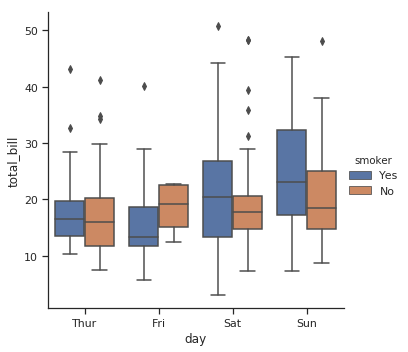

In [10]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

通过设置dodge为False可以禁用这种闪避行为

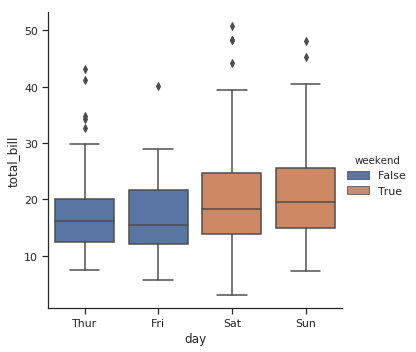

In [11]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",kind="box", dodge=False, data=tips)

boxenplot()与boxplot()类似，但是它可以描述更多的分布信息，非常适合较大的数据集。

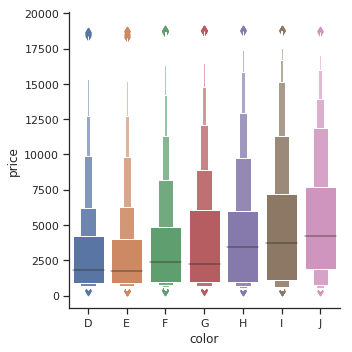

In [12]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",data=diamonds.sort_values("color"))

### 小提琴图

小提琴图是另一种表示数据分布的方式，它结合了箱形图和核密度估计过程。

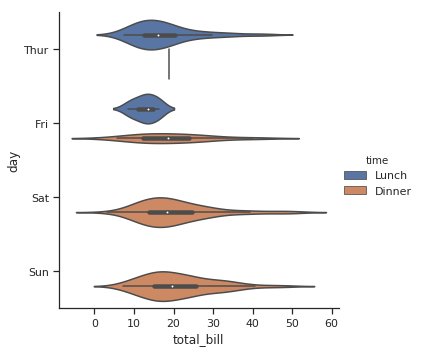

In [13]:
sns.catplot(x="total_bill", y="day", hue="time",kind="violin", data=tips)

在上图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计。虽然这种方法是通过核密度估计提供了更多的分布信息，但它使用了核密度估计，可能需要调整一些参数，比箱形图更加复杂。

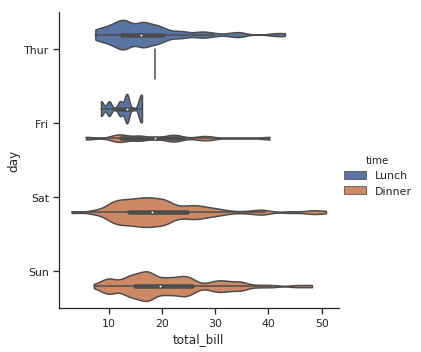

In [14]:
sns.catplot(x="total_bill", y="day", hue="time",kind="violin", bw=.15, cut=0,data=tips)

当色调参数只有两个级别时，也可以分裂小提琴，这样可以更有效地利用空间

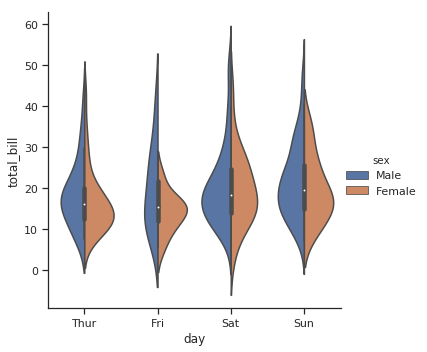

In [15]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", split=True, data=tips)

通过设置inner参数可以有更多的方式绘制小提琴内部，如使用单独的观察值而不是观察值的统计描述

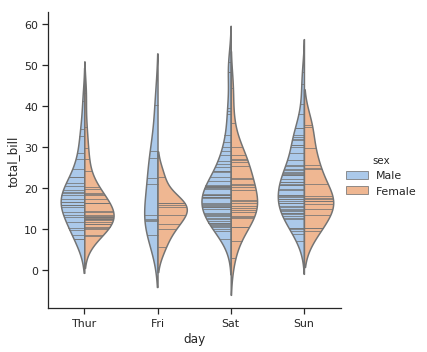

In [16]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", inner="stick", split=True,palette="pastel", data=tips)

散点图和分布图也可以结合起来使用

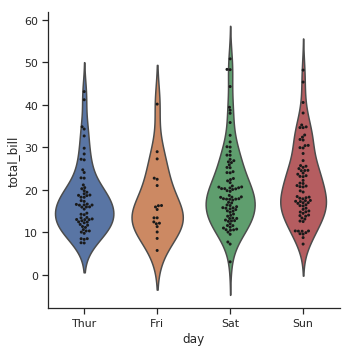

In [17]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

## 类内的统计估计图

除了观察数据的分布，有时候也需要估计数据的趋势。Seaborn中提供了条形图和点图两种方式来。

### 条形图

在seaborn中，barplot调用函数在整个数据集上得到估计值（默认时均值）。如果每个类别上有多个观测值，该函数使用bootstrap方法计算置信区间。

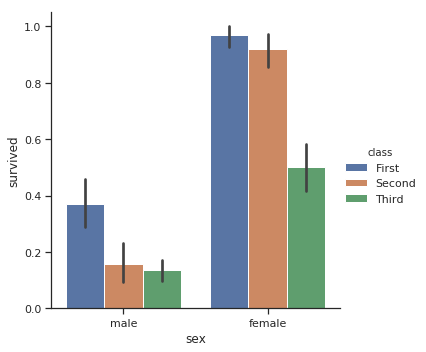

In [18]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

有时候我们并不需要计算观测变量的统计值，而仅仅想得到观测值的出现次数。此时使用countplot()绘制直方图

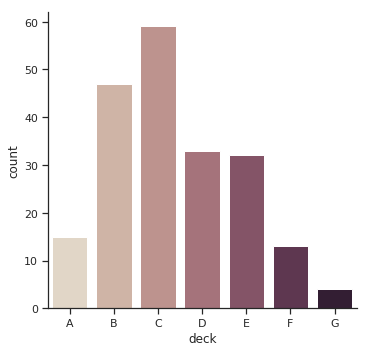

In [19]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

同其他绘图函数一样，barplot和countplot函数也可以设置色调语义，修改样式等。

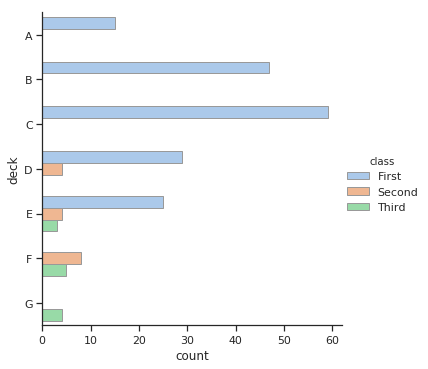

In [20]:
sns.catplot(y="deck", hue="class", kind="count",palette="pastel", edgecolor=".6",data=titanic)

### 点图

与条形图不同，点图使用点表示估计值和置信区间，同时用直线连接相同语义的点。这样可以更只管的描述数据的变化趋势。

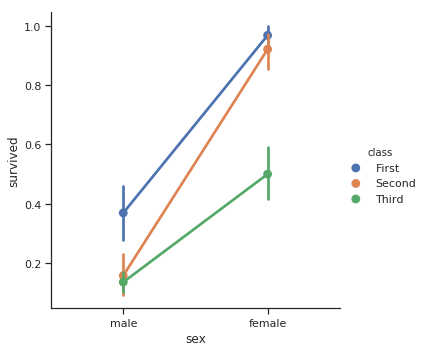

In [21]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

通过marker和style参数可以修改点和线的样式

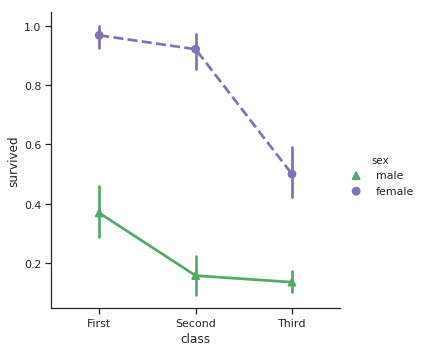

In [22]:
sns.catplot(x="class", y="survived", hue="sex",palette={"male": "g", "female": "m"},markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

## "宽格式"数据绘图

尽管更适合绘制“长格式”数据或者“简单”数据，但这些函数也可以用于很多种“宽”格式的数据，如pands的DataFrame以及numpy的二维数组。这些数据类型可以直接赋值给data参数

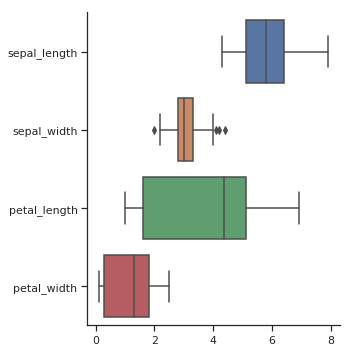

In [23]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")

除此之外，axes-level函数也可以接受pandas或者numpy的向量对象而不是DataFrame中的变量作为参数。

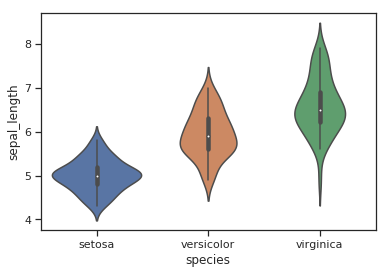

In [24]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

如果要控制图像的大小和形状，只能通过matplotlib的命令来修改。

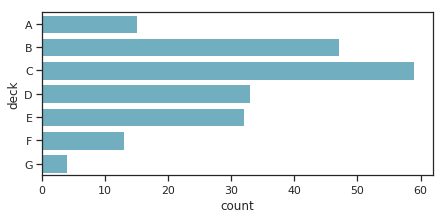

In [25]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c")

## 使用facets绘制多个关系图

与relplot类似，catplot也是在FaceGrid上绘图，因此可以添加faceting变量来绘制高维关系图。

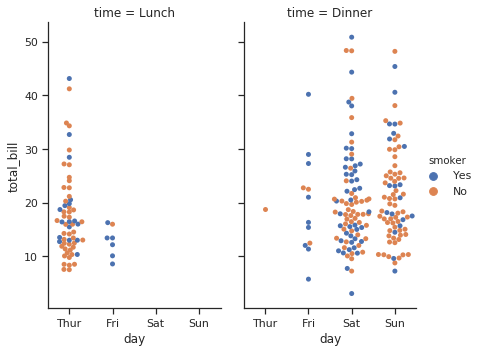

In [26]:
sns.catplot(x="day", y="total_bill", hue="smoker",col="time", aspect=.6,kind="swarm", data=tips)

如果要自定义更多的样式，需要对catplot函数返回的FaceGrid对象进行设置。

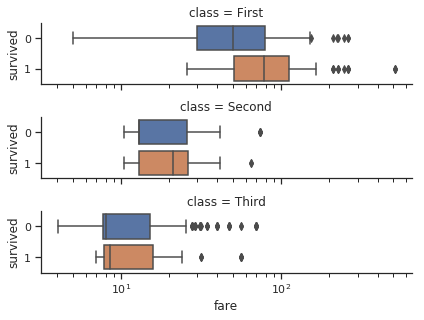

In [27]:
g = sns.catplot(x="fare", y="survived", row="class",kind="box", orient="h", height=1.5, aspect=4,data=titanic.query("fare > 0"))
g.set(xscale="log")